In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset : Custmers from a shoppingmall
Downloaded from Kaggle, which has custmer information for a shopping mall.
Here, I am considering only two columns to cluster (Annual Income and Spending Score)

Annual Income : yealy earning of that custmer
Spadning Score : how much custmer is spending for shopping out of the annual income
Model : KMeans Clusters

In [3]:
df = pd.read_csv('Customers.csv')

Observing the Dataset 

In [63]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Slecting the require features to cluster into a separate DataFrame X

In [19]:
X = df.iloc[:,[3,4]]
X

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

Scatter plot before clustering 
Here, by looking at the scatter. I couldn't able to fnd the number of clusters to determine by visually

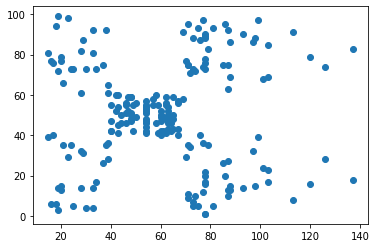

In [20]:
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.show()

Finding the best cluster number using for loop:

In [29]:
from sklearn.cluster import KMeans

clusters = range(1,11)
inertias = []
for i in clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia = model.inertia_
    inertias.append(inertia)

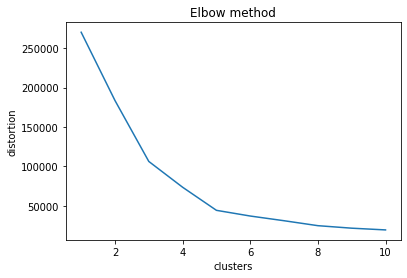

In [30]:
plt.plot(clusters,inertias)
plt.title('Elbow method')
plt.xlabel('clusters')
plt.ylabel('distortion')
plt.show()

Elbow Point:

As we see noticed from above plot between the inertia and number of clusters
the minimal number of inertia is formed at the number of clusters = 5 
So, let's predict our labels at 5 clusters

In [59]:
model = KMeans(n_clusters=5)
labels=model.fit_predict(X)
centeroids = model.cluster_centers_
print(labels)
print(centeroids)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


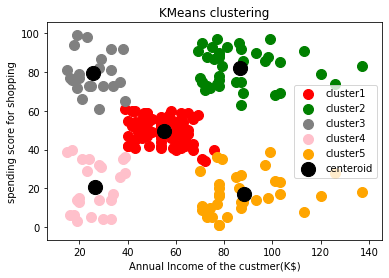

In [64]:
plt.scatter(X.iloc[labels==0,0],X.iloc[labels==0,1],s=100,c='red',label='cluster1')
plt.scatter(X.iloc[labels==1,0],X.iloc[labels==1,1],s=100,c='green',label='cluster2')
plt.scatter(X.iloc[labels==2,0],X.iloc[labels==2,1],s=100,c='grey',label='cluster3')
plt.scatter(X.iloc[labels==3,0],X.iloc[labels==3,1],s=100,c='pink',label='cluster4')
plt.scatter(X.iloc[labels==4,0],X.iloc[labels==4,1],s=100,c='orange',label='cluster5')

plt.scatter(centeroids[:,0],centeroids[:,1],s=200,c='black',label='centeroid')
plt.title('KMeans clustering')
plt.xlabel('Annual Income of the custmer(K$)')
plt.ylabel('spending score for shopping')
plt.legend()
plt.show()

Final Summary :

cluster 3 & 4
1) the custmers who are having spending score (0-40) and (60-100) are having annual income around (20 -40)K dollars 
cluster 2 & 5
2) there are also custmers who are having same spending score (0-40) and (60-100) are having annual income around (70 -140)K dollars
cluster 1 
3) the custmers who are having spending score (40-60) are having the annual income around (40-70) K dollars